In [1]:
! pip install seaborn
! pip install scipy
! pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [2]:
#Read the data
data = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory=False)
data.to_csv('household_power_consumption.csv')

In [3]:
data.head() 

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
#Measurements of electric power consumption in one household between December 2006 and November 2010 (47 months).
#target Global_active_power
#Global_active_power - Total power consumption in kilowatt
#Global_reactive_power - part of electricity not perform useful work but is required to maintain the electric and magnetic fields in kilowatt
#Voltage - Without voltage, the electric current wouldn't flow
#Global_intensity - refers to the total electric current flow
#Sub_metering_1	Sub_metering_2	Sub_metering_3 - measure energy usage in watt-hour of active energy
# sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
# sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
# sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [5]:
### data cleaning
#Exploratory Data Analysis (EDA)

In [6]:
data.shape

(2075259, 9)

In [7]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
#check the null value data
data[data['Sub_metering_3'].isnull()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [9]:
#drop the null values
data = data.dropna()

In [10]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [11]:
#reset the index 
data = data.reset_index(drop = True)

In [12]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [13]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 140.7+ MB


In [15]:
# convert Date Time object to date time
#Parse date and time into separate features

In [16]:
#combine date and time column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format = '%d/%m/%Y %H:%M:%S')

In [17]:
#Parse date and time into separate features
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day

In [18]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,2006,12,16
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,2006,12,16
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,2006,12,16
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,2006,12,16
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,2006,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0,2010-11-26 20:58:00,2010,11,26
2049276,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0,2010-11-26 20:59:00,2010,11,26
2049277,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0,2010-11-26 21:00:00,2010,11,26
2049278,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0,2010-11-26 21:01:00,2010,11,26


In [19]:
#drop the original Date and Time columns 
data = data.drop(columns=['Date', 'Time', 'DateTime'])

In [20]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006,12,16
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006,12,16
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006,12,16
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006,12,16
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.430,4.000,0.000,0.000,0.0,2010,11,26
2049276,0.944,0.000,240.000,4.000,0.000,0.000,0.0,2010,11,26
2049277,0.938,0.000,239.820,3.800,0.000,0.000,0.0,2010,11,26
2049278,0.934,0.000,239.700,3.800,0.000,0.000,0.0,2010,11,26


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
 7   Year                   int32  
 8   Month                  int32  
 9   Day                    int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 132.9+ MB


In [22]:
#convert datatypes
columns_to_convert =  ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in columns_to_convert:
    data[i] = data[i].astype(float)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Year                   int32  
 8   Month                  int32  
 9   Day                    int32  
dtypes: float64(7), int32(3)
memory usage: 132.9 MB


In [24]:
#correlation

In [25]:
corr_data = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

In [26]:
corr_data.corr()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_reactive_power,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


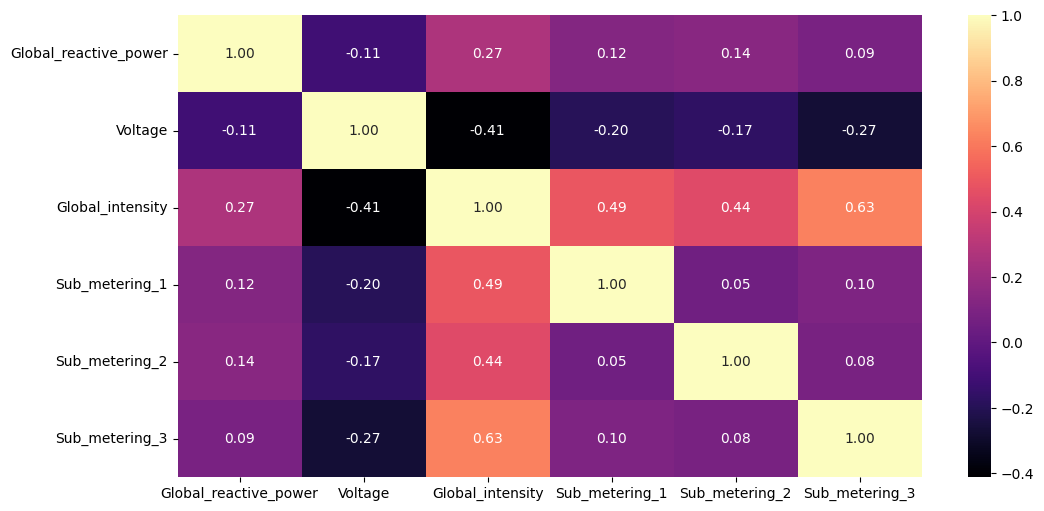

In [27]:
#heat map 
plt.figure(figsize=(12, 6))
sns.heatmap(corr_data.corr(), cmap= 'magma', fmt= '.2f', annot=True)
plt.show()

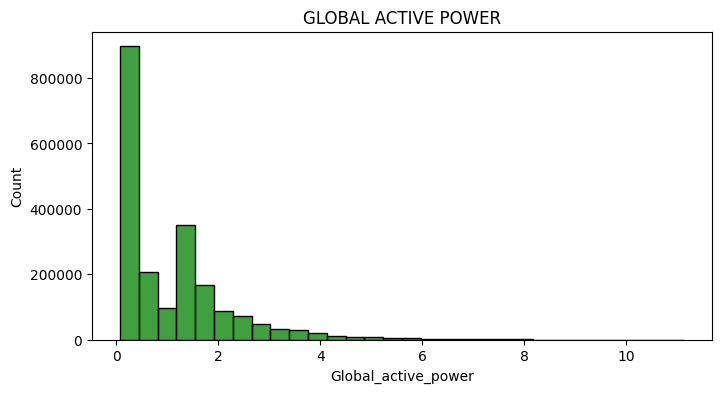

In [32]:
#visualization
plt.figure(figsize=(8,4))
sns.histplot(data = data['Global_active_power'], color= 'green', bins = 30)
plt.title('GLOBAL ACTIVE POWER')
#plt.xlabel('Value Range')
#plt.ylabel('Frequency')
plt.show()



#### Global active power
##### Global active power - Total power consumption (kilowatt)
The distribution is right-skewed means Most data points have low power consumption values (closer to 0),
higher power consumption values occur less




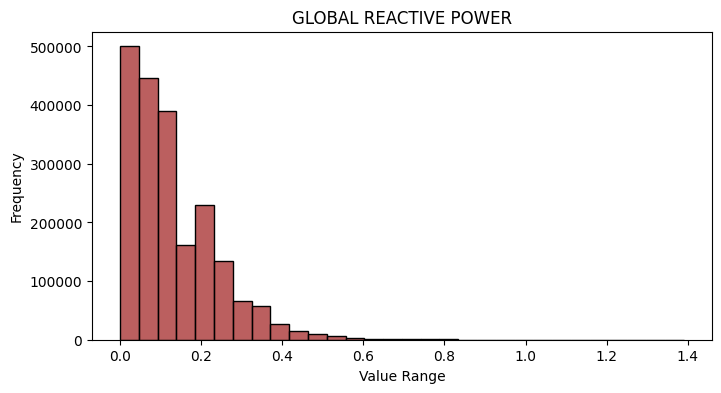

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Global_reactive_power'], color= 'brown', bins = 30)
plt.title('GLOBAL REACTIVE POWER')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()


#### Global Reactive power
The distribution is right-skewed, meaning the majority of the data lies in the lower range,  higher values occur less.



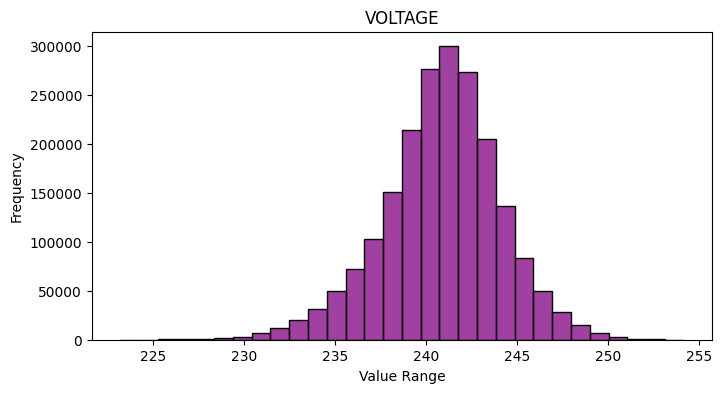

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Voltage'], color= 'purple', bins = 30)
plt.title('VOLTAGE')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

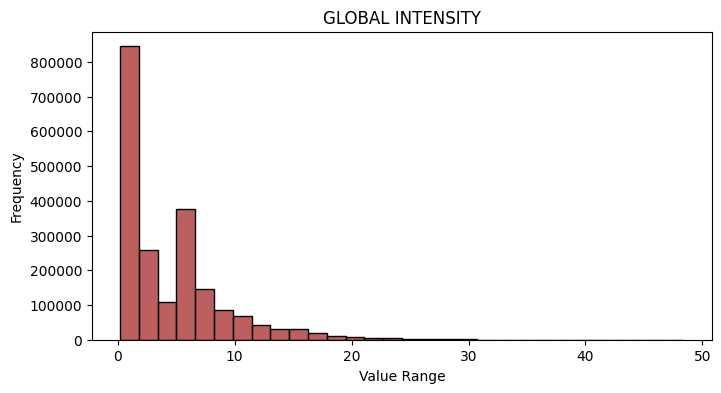

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Global_intensity'], color = 'brown', bins = 30)
plt.title('GLOBAL INTENSITY')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

#### Global intensity 
##### refers to the total electric current flow
The graph shows that most of the  values are at the lower end of the range, forming a right-skewed distribution.

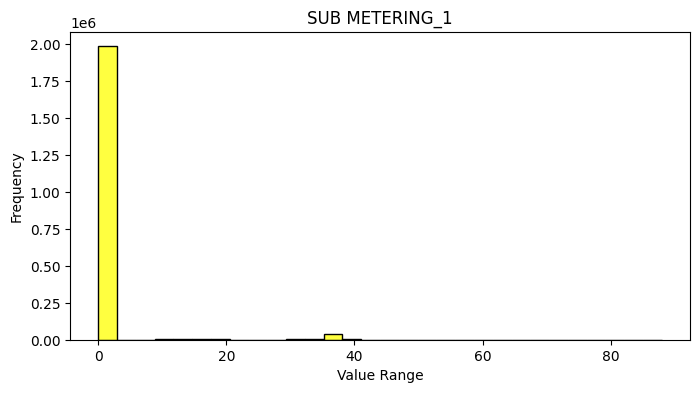

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Sub_metering_1'], color= 'yellow', bins= 30)
plt.title('SUB METERING_1')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

##### sub meter 1
#####  used for measure energy usage
It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
The graph is right-skewed, meaning that most values are near the lower end (close to zero).

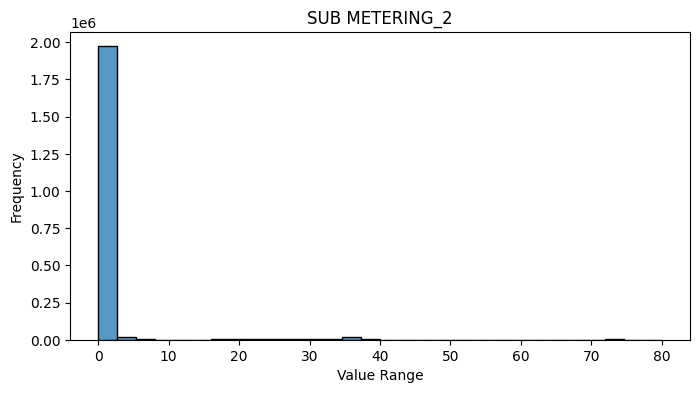

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Sub_metering_2'], bins = 30)
plt.title('SUB METERING_2')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

##### sub meter 2
#####  used for measure energy usage
It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
The graph is right-skewed, meaning that most values are near the lower end (close to zero).

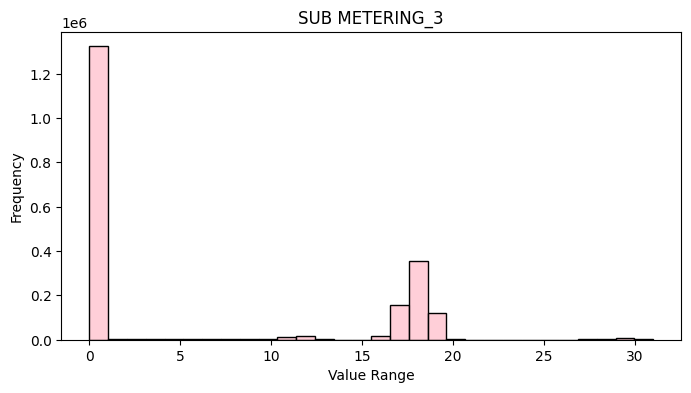

In [35]:
plt.figure(figsize=(8,4))
sns.histplot(data = data['Sub_metering_3'], color= 'pink', bins=30)
plt.title('SUB METERING_3')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()


#### sub meter 3 
#####  used for measure energy usage
It corresponds to an electric water-heater and an air-conditioner.
Right-Skewed Distribution: data mostly near zero, it indicate minimal energy usage.

In [ ]:

numerical_data =data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

<Axes: >

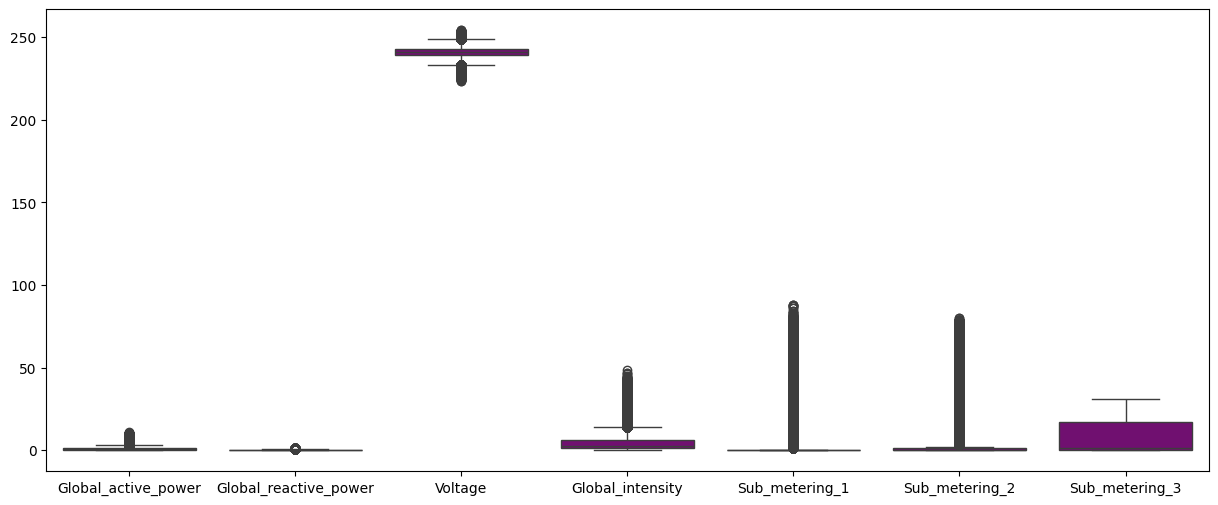

In [40]:
# outlier detection
plt.figure(figsize=(15, 6))
sns.boxplot(numerical_data, color = 'purple')

In [41]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26


In [42]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Global_active_power_outlier = data[(data['Global_active_power'] < lower_bound) | (data['Global_active_power'] > upper_bound)]
print(Global_active_power_outlier)


         Global_active_power  Global_reactive_power  Voltage  \
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
11                     5.412                  0.470   232.78   
12                     5.224                  0.478   232.99   
...                      ...                    ...      ...   
2045610                4.666                  0.000   235.72   
2045611                4.694                  0.000   236.78   
2045612                4.602                  0.000   237.08   
2045614                4.626                  0.000   236.78   
2047018                5.074                  0.240   238.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1                    23.0             0.0             1.0            16.0   
2                    23.0             0.0             2.0            17.0   


In [43]:
no_outlier_data = data[(data['Global_active_power'] >= lower_bound) & (data['Global_active_power'] <= upper_bound)]
print(no_outlier_data.shape)

(2022646, 10)


In [44]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Global_reactive_power'].quantile(0.25)
Q3 = data['Global_reactive_power'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Global_reactive_power_outlier = data[(data['Global_reactive_power'] < lower_bound) | (data['Global_reactive_power'] > upper_bound)]
print(Global_reactive_power_outlier)

         Global_active_power  Global_reactive_power  Voltage  \
1154                   2.930                  0.574   236.10   
1155                   3.182                  0.582   236.37   
1548                   3.764                  0.562   232.40   
2831                   2.544                  0.582   241.14   
2832                   2.536                  0.578   241.32   
...                      ...                    ...      ...   
2048913                2.250                  0.674   238.09   
2048914                2.350                  0.696   238.19   
2048915                2.254                  0.692   238.02   
2048916                2.226                  0.690   238.10   
2048917                2.240                  0.696   238.82   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1154                 13.0             0.0             2.0            18.0   
1155                 13.8             0.0             1.0            17.0   


In [45]:
no_outlier_data = data[(data['Global_reactive_power'] >= lower_bound) & (data['Global_reactive_power'] <= upper_bound)]
print(no_outlier_data.shape)

(2040864, 10)


In [46]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Voltage'].quantile(0.25)
Q3 = data['Voltage'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Voltage_outlier = data[(data['Voltage'] < lower_bound) | (data['Voltage'] > upper_bound)]
print(Voltage_outlier)

         Global_active_power  Global_reactive_power  Voltage  \
3007                   6.158                  0.442   229.08   
7362                   5.296                  0.346   228.91   
18900                  7.166                  0.064   229.06   
18959                  6.086                  0.000   229.04   
18960                  5.928                  0.000   228.94   
...                      ...                    ...      ...   
2040506                6.210                  0.174   228.82   
2040519                4.284                  0.308   228.87   
2040520                5.330                  0.328   228.26   
2040521                5.226                  0.326   228.57   
2040522                5.428                  0.350   229.09   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
3007                 27.0             0.0            36.0             0.0   
7362                 23.2            35.0             1.0             0.0   


In [47]:
no_outlier_data = data[(data['Voltage'] >= lower_bound) & (data['Voltage'] <= upper_bound)]
print(no_outlier_data.shape)

(2045988, 10)


In [48]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Global_intensity'].quantile(0.25)
Q3 = data['Global_intensity'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Global_intensity_outlier = data[(data['Global_intensity'] < lower_bound) | (data['Global_intensity'] > upper_bound)]
print(Global_intensity_outlier)

         Global_active_power  Global_reactive_power  Voltage  \
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
10                     4.448                  0.498   232.86   
11                     5.412                  0.470   232.78   
...                      ...                    ...      ...   
2045611                4.694                  0.000   236.78   
2045612                4.602                  0.000   237.08   
2045613                4.536                  0.000   237.03   
2045614                4.626                  0.000   236.78   
2047018                5.074                  0.240   238.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1                    23.0             0.0             1.0            16.0   
2                    23.0             0.0             2.0            17.0   


In [49]:
no_outlier_data = data[(data['Global_intensity'] >= lower_bound) & (data['Global_intensity'] <= upper_bound)]
print(no_outlier_data.shape)

(2019388, 10)


In [50]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Sub_metering_1'].quantile(0.25)
Q3 = data['Sub_metering_1'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Sub_metering_1_outlier = data[(data['Sub_metering_1'] < lower_bound) | (data['Sub_metering_1'] > upper_bound)]
print(Sub_metering_1_outlier)

         Global_active_power  Global_reactive_power  Voltage  \
1019                   2.242                  0.162   237.33   
1020                   3.714                  0.296   235.15   
1021                   3.212                  0.304   235.99   
1022                   3.694                  0.280   235.16   
1023                   3.204                  0.292   236.08   
...                      ...                    ...      ...   
2048596                3.632                  0.064   239.56   
2048597                3.552                  0.064   239.84   
2048598                3.552                  0.064   240.07   
2048599                1.772                  0.054   241.40   
2048604                1.296                  0.052   240.87   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1019                 10.0             1.0             7.0            17.0   
1020                 15.8             2.0            35.0            17.0   


In [51]:
no_outlier_data = data[(data['Sub_metering_1'] >= lower_bound) & (data['Sub_metering_1'] <= upper_bound)]
print(no_outlier_data.shape)

(1880175, 10)


In [52]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Sub_metering_2'].quantile(0.25)
Q3 = data['Sub_metering_2'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Sub_metering_2_outlier = data[(data['Sub_metering_2'] < lower_bound) | (data['Sub_metering_2'] > upper_bound)]
print(Sub_metering_2_outlier)

         Global_active_power  Global_reactive_power  Voltage  \
39                     3.740                  0.108   236.93   
40                     4.928                  0.202   235.01   
41                     6.052                  0.192   232.93   
42                     6.752                  0.186   232.12   
43                     6.474                  0.144   231.85   
...                      ...                    ...      ...   
2046202                1.202                  0.000   236.44   
2046203                0.782                  0.000   237.24   
2046205                0.780                  0.000   237.67   
2046207                0.860                  0.080   239.46   
2046209                0.860                  0.112   239.52   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
39                   16.4             0.0            16.0            18.0   
40                   21.0             0.0            37.0            16.0   


In [53]:
no_outlier_data = data[(data['Sub_metering_2'] >= lower_bound) & (data['Sub_metering_2'] <= upper_bound)]
print(no_outlier_data.shape)

(1979318, 10)


In [54]:
# detect the outlier using IQR
# calculate Q1, Q3 and IQR
Q1 = data['Sub_metering_3'].quantile(0.25)
Q3 = data['Sub_metering_3'].quantile(0.75)
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#outlier data
Sub_metering_3_outlier = data[(data['Sub_metering_3'] < lower_bound) | (data['Sub_metering_3'] > upper_bound)]
print(Sub_metering_3_outlier)

Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Year, Month, Day]
Index: []


In [55]:
no_outlier_data = data[(data['Sub_metering_3'] >= lower_bound) & (data['Sub_metering_3'] <= upper_bound)]
print(no_outlier_data.shape)

(2049280, 10)


In [56]:
#function to remove the outlier using IQR
def remove_outlier(data, columns, range = 2.5):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - range * IQR
        upper_bound = Q3 + range * IQR
        
        
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        return data

columns_to_check = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

cleaned_data = remove_outlier(data, columns_to_check)
        

In [57]:
cleaned_data = remove_outlier(data, columns_to_check)
print(cleaned_data.shape)        

(2022646, 10)


In [58]:
2049279 -2022646


26633

In [59]:
cleaned_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26


### Linear Regression

In [60]:
#for model
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [61]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26


In [62]:
#target Global_active_power

In [63]:
#split values and target
cleaned_data.drop( 'Global_active_power', axis=1)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
4,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
5,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16
6,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16
7,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...
2049275,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2049276,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2049277,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26
2049278,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26


In [64]:
val = cleaned_data.drop('Global_active_power', axis = 1)
val

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
0,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
4,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
5,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16
6,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16
7,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...
2049275,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2049276,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2049277,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26
2049278,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26


In [65]:
target = cleaned_data['Global_active_power']
target

0          4.216
4          3.666
5          3.520
6          3.702
7          3.700
           ...  
2049275    0.946
2049276    0.944
2049277    0.938
2049278    0.934
2049279    0.932
Name: Global_active_power, Length: 2022646, dtype: float64

In [66]:
#split train data & test data
trdata, tsdata, trlab, tslab = train_test_split(val, target, test_size=0.20, random_state= 44)

In [67]:
trdata

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
407778,0.000,241.19,1.4,0.0,1.0,0.0,2007,9,28
129993,0.104,238.98,4.6,0.0,0.0,0.0,2007,3,17
440114,0.000,243.20,1.0,0.0,0.0,0.0,2007,10,21
595715,0.344,244.93,2.4,0.0,1.0,0.0,2008,2,6
1517714,0.000,238.39,5.2,0.0,0.0,18.0,2009,11,10
...,...,...,...,...,...,...,...,...,...
51497,0.202,234.59,16.6,37.0,0.0,17.0,2007,1,21
161800,0.094,239.31,9.8,0.0,0.0,0.0,2007,4,8
1325824,0.156,240.36,1.6,0.0,1.0,1.0,2009,6,29
1798334,0.000,241.42,1.2,0.0,0.0,1.0,2010,5,27


In [68]:
trdata.shape

(1618116, 9)

In [69]:
trlab

407778     0.324
129993     1.092
440114     0.228
595715     0.472
1517714    1.280
           ...  
51497      3.928
161800     2.364
1325824    0.344
1798334    0.268
1610449    0.318
Name: Global_active_power, Length: 1618116, dtype: float64

In [70]:
trlab.shape

(1618116,)

In [71]:
tsdata

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day
215125,0.108,238.28,2.6,0.0,0.0,0.0,2007,5,17
2005582,0.000,246.91,1.2,0.0,1.0,1.0,2010,10,27
1466630,0.116,242.66,1.6,0.0,0.0,1.0,2009,10,6
489574,0.000,239.95,5.2,0.0,0.0,18.0,2007,11,24
1768162,0.066,238.00,1.0,0.0,0.0,0.0,2010,5,6
...,...,...,...,...,...,...,...,...,...
1949379,0.000,241.50,8.2,0.0,0.0,19.0,2010,9,14
163911,0.118,240.74,1.4,0.0,0.0,0.0,2007,4,9
1016340,0.092,240.59,16.4,0.0,0.0,18.0,2008,11,24
451695,0.000,243.77,0.8,0.0,0.0,0.0,2007,10,29


In [72]:
tsdata.shape

(404530, 9)

In [73]:
tslab

215125     0.602
2005582    0.300
1466630    0.368
489574     1.282
1768162    0.236
           ...  
1949379    1.980
163911     0.318
1016340    3.966
451695     0.208
529849     1.768
Name: Global_active_power, Length: 404530, dtype: float64

In [74]:
tslab.shape

(404530,)

In [75]:
#Building model

model = LinearRegression()
model

LinearRegression()

In [76]:
model.fit(trdata, trlab)

LinearRegression()

In [77]:
#prediction
tr_pred = model.predict(trdata) #training prediction
ts_pred = model.predict(tsdata) #test  prediction

In [78]:
tr_pred

array([0.33276615, 1.0682766 , 0.24574327, ..., 0.35203032, 0.29011621,
       0.33223877], shape=(1618116,))

In [79]:
ts_pred

array([0.58734562, 0.3126441 , 0.36827348, ..., 3.93035422, 0.20071742,
       1.77484031], shape=(404530,))

In [80]:
# validate performance

In [81]:
#training performance
mean_squared_error(trlab, tr_pred)

0.001577683164008626

In [82]:
root_mean_squared_error(trlab, tr_pred) #training

0.03972005996985183

In [83]:
data['Global_active_power'].mean()

np.float64(1.0916150365006243)

In [84]:
# check testing error
mean_squared_error(tslab, ts_pred) #test

0.0015693250998210662

In [85]:
root_mean_squared_error(tslab, ts_pred) #test

0.03961470812490061

In [86]:
r2_score(trlab, tr_pred) #train

0.9981802814901848

In [87]:
r2_score(tslab, ts_pred) #test

0.9981809668920643